# IF-1018 Minería de Datos Uaysen

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2

In [1]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [3]:
print(type(faces))
print(faces.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'images', 'target', 'DESCR'])


In [4]:
faces.data.shape
faces['data'].shape

(400, 4096)

In [5]:
# Informacion descriptiva de la base de datos
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

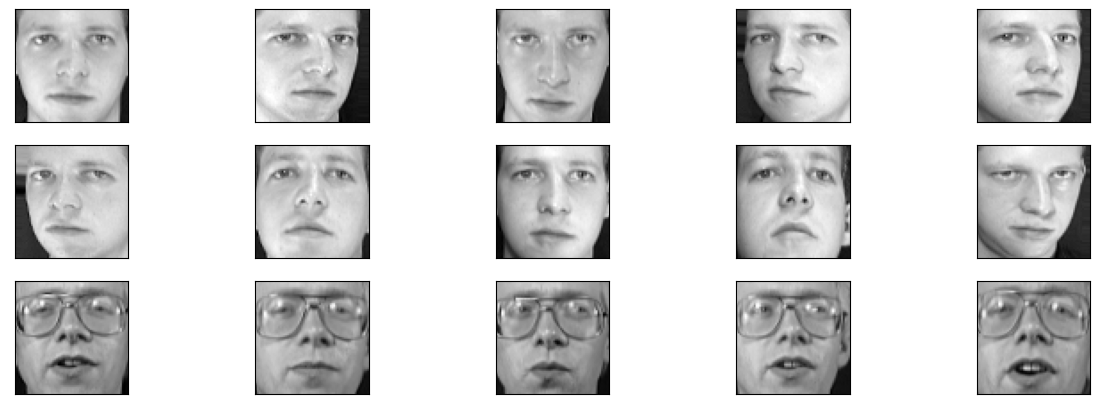

In [6]:
# Informacion descriptiva de la base de datos
#print(faces.DESCR)

import matplotlib.pyplot as plt

# Visualizar las primeras 10 imágenes
fig, axes = plt.subplots(3, 5, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()




## Actividad en clase

Preprocese el dataset usando **PCA**. Para esto haga lo siguiente:

- Aplique min-max scaler al dataset.
- Calcule PCA con 400 componentes.
- Calcule el número de componentes que retienen el 55% de la varianza del dataset.
- Calcule el número de componentes que retienen el 70% de la varianza del dataset.
- Calcule el número de componentes que retienen el 99% de la varianza del dataset.
- Ajuste el dataset usando un PCA que retenga el 55% de la varianza.
- Ajuste el dataset usando un PCA que retenga el 70% de la varianza.
- Ajuste el dataset usando un PCA que retenga el 99% de la varianza.
- Calcula las pairwise euclidean distances para las tres proyecciones PCA calculadas anteriormente.
- Muestre los histogramas de las tres pairwise euclidean distances.
- ¿Cómo interpreta los histogramas?
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


# Solución

In [7]:
from sklearn import preprocessing
# Las imágenes están almacenadas en el arreglo 'faces.data'
min_max_scaler = preprocessing.MinMaxScaler() #MinMaxsacaler() escala los rango a [0,1] por defecto.
X = min_max_scaler.fit_transform(faces.data)  # ejecuta el escalador anterior y lo guarda en la variable X
print(X)

[[0.31034485 0.3989071  0.41798943 ... 0.10900474 0.12060302 0.1570681 ]
 [0.5114943  0.5355191  0.53968257 ... 0.10900474 0.11055275 0.15183246]
 [0.3218391  0.442623   0.5132276  ... 0.09478673 0.10552763 0.15183246]
 ...
 [0.57471263 0.6174864  0.6613757  ... 0.13744076 0.10552763 0.19895288]
 [0.1781609  0.20218578 0.16402118 ... 0.5924171  0.643216   0.7225131 ]
 [0.5977012  0.5245902  0.24338625 ... 0.34597158 0.3567839  0.44502622]]


In [8]:
# Analisis de Componentes Principales

from sklearn.decomposition import PCA
pca = PCA(n_components=400) # Los datos tiene 400 componentes
pca.fit(X)


PCA(n_components=400)

In [10]:
varianza_explicada.sum()

0.99999994

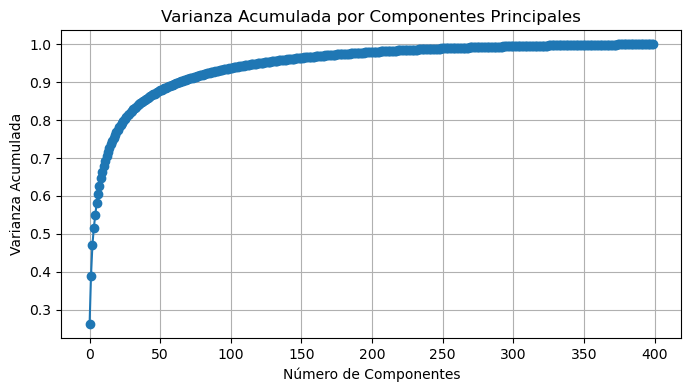

In [9]:
import matplotlib.pyplot as plt

# contiene la proporción de la varianza total del dataset que es explicada por cada uno de los componentes
# la suma total debe ser igual a 1
varianza_explicada = pca.explained_variance_ratio_ 

# Calcula la suma acumulativa de los elementos a lo largo del eje
varianza_acumulada = varianza_explicada.cumsum()

plt.figure(figsize=(8, 4))
plt.plot(varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada por Componentes Principales')
plt.grid(True)
plt.show()


In [11]:
# argmax() = Encuentra el índice del primer valor que cumple la condición
componentes_55 = (varianza_acumulada >= 0.55).argmax() + 1
print(f"Número de componentes que retienen el 55% de la varianza: {componentes_55}")


Número de componentes que retienen el 55% de la varianza: 6


In [12]:
componentes_70 = (varianza_acumulada >= 0.70).argmax() + 1
print(f"Número de componentes que retienen el 70% de la varianza: {componentes_70}")


Número de componentes que retienen el 70% de la varianza: 13


In [13]:
componentes_99 = (varianza_acumulada >= 0.99).argmax() + 1
print(f"Número de componentes que retienen el 99% de la varianza: {componentes_99}")


Número de componentes que retienen el 99% de la varianza: 260


In [14]:
pca = PCA(n_components=6)
X_6= pca.fit_transform(X)

pca = PCA(n_components=13)
X_13= pca.fit_transform(X)

pca = PCA(n_components=260)
X_260=pca.fit_transform(X)

In [15]:
from sklearn.metrics import pairwise_distances
import numpy as np
# Distancias euclidianas

# proyección con 6 componentes
distancias_6 = pairwise_distances(X_6, metric='euclidean')

# proyección con 13 componentes
distancias_13 = pairwise_distances(X_13, metric='euclidean')

# proyección con 260 componentes
distancias_260 = pairwise_distances(X_260, metric='euclidean')


In [16]:
# Opcional: Ver algunas de las distancias calculadas
print(f"Algunas distancias (6 componentes): \n{distancias_6[:5, :5]}")
print(f"\n Algunas distancias (13 componentes): \n{distancias_13[:5, :5]}")
print(f"\n Algunas distancias (260 componentes): \n{distancias_260[:5, :5]}")


Algunas distancias (6 componentes): 
[[ 0.       12.073414  3.020489 17.17136   8.841386]
 [12.073414  0.        9.972278 25.144815  7.399224]
 [ 3.020489  9.972278  0.       17.65646   6.286696]
 [17.17136  25.144815 17.65646   0.       20.758717]
 [ 8.841386  7.399224  6.286696 20.758717  0.      ]]

 Algunas distancias (13 componentes): 
[[ 0.        13.941682   3.7359805 18.346943  10.322906 ]
 [13.941682   0.        11.973485  25.623943   8.053251 ]
 [ 3.7359805 11.973485   0.        19.030058   8.428455 ]
 [18.346943  25.623943  19.030058   0.        20.958168 ]
 [10.322906   8.053251   8.428455  20.958168   0.       ]]

 Algunas distancias (260 componentes): 
[[ 0.        16.450994   8.473814  19.891914  14.049857 ]
 [16.450994   0.        15.701603  27.311554  11.2737665]
 [ 8.473814  15.701603   0.        21.086409  13.514802 ]
 [19.891914  27.311554  21.086409   0.        22.7232   ]
 [14.049857  11.2737665 13.514802  22.7232     0.       ]]


In [17]:
# flatten() = Convierte la matriz 2D en un vector 1D.
distancias_6_flat = distancias_6.flatten()
distancias_13_flat = distancias_13.flatten()
distancias_260_flat = distancias_260.flatten()


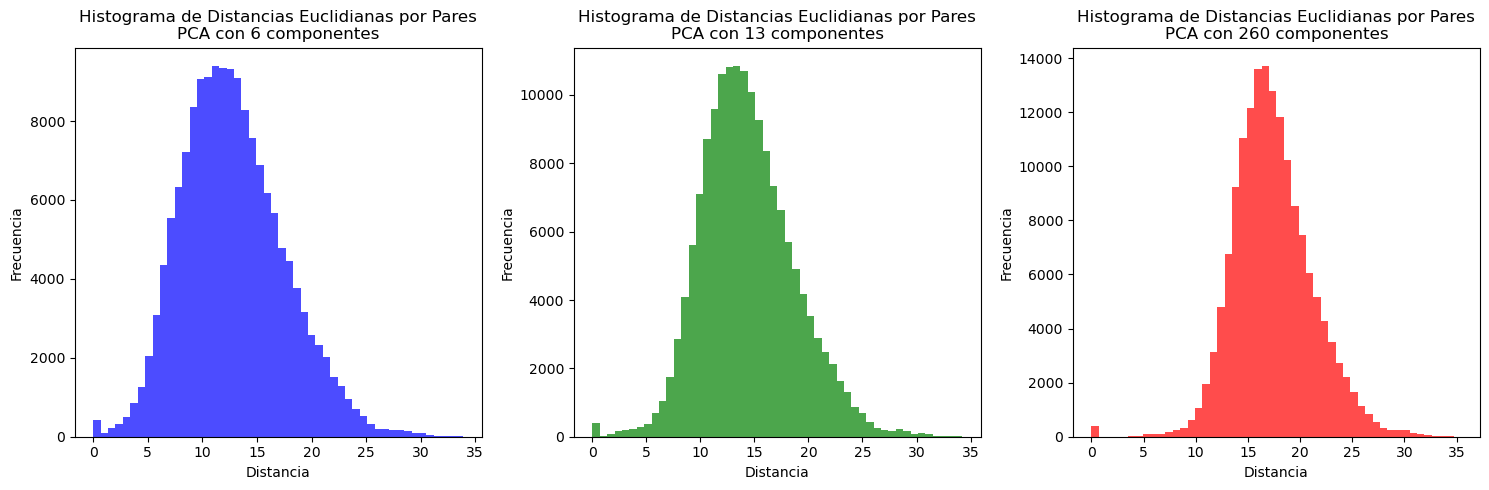

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Histograma para 6 componentes
plt.subplot(1, 3, 1)
plt.hist(distancias_6_flat, bins=50, color='blue', alpha=0.7)
plt.title('Histograma de Distancias Euclidianas por Pares\nPCA con 6 componentes')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')

# Histograma para 13 componentes
plt.subplot(1, 3, 2)
plt.hist(distancias_13_flat, bins=50, color='green', alpha=0.7)
plt.title('Histograma de Distancias Euclidianas por Pares\nPCA con 13 componentes')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')

# Histograma para 260 componentes
plt.subplot(1, 3, 3)
plt.hist(distancias_260_flat, bins=50, color='red', alpha=0.7)
plt.title('Histograma de Distancias Euclidianas por Pares\nPCA con 260 componentes')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


* PCA con 6 Componentes: La mayoría de las distancias se concentran alrededor de 10-15. La distribución es más dispersa en comparación con las proyecciones con más componentes.
* PCA con 13 Componentes: El pico de la distribución se desplaza ligeramente hacia la derecha, concentrando las distancias alrededor de 13-15. La dispersión sigue siendo significativa, pero la varianza es un poco menor en comparación con el caso de 6 componentes.
* PCA con 260 Componentes: Aquí, las distancias se concentran más estrechamente alrededor de 15-20, con un pico más pronunciado y una dispersión más reducida. Esto indica que, al utilizar más componentes, las distancias entre los puntos en el espacio proyectado tienden a aumentar, y las distancias se vuelven más consistentes.